In [17]:
!pip install tensorflow 
!pip install keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

In [136]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data() #loading mnist data

In [137]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [138]:
X_train[0] # to see a data element in X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [139]:
Y_train[0]

5

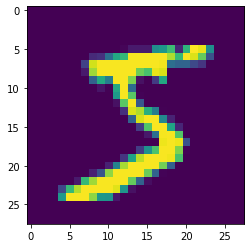

In [140]:
#to print image as a picture
plt.imshow(X_train[0])

In [141]:
#reshape the data to fit the model
X_train= X_train.reshape(60000,28,28,1) 
X_test= X_test.reshape(10000,28,28,1)
X_train=X_train/255
X_test=X_test/255

In [142]:
#one hot encoding
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)
#print the new label
print(Y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [143]:
classifier= Sequential()
#add convolutional layers
classifier.add(Convolution2D(64,(3,3), input_shape=(28,28,1), activation='relu',))
#classifier.add(Convolution2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.30))
classifier.add(Convolution2D(128,(3,3), activation='relu',))
#classifier.add(Convolution2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(512 , activation='relu'))
classifier.add(Dense(128 , activation='relu'))
from keras.layers import Dropout
classifier.add(Dropout(0.20))#power of dropout**
classifier.add(Dense(10 , activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
#train model #batch_size************* epochs**********
classifier.fit(X_train, Y_train_one_hot, validation_data =(X_test,Y_test_one_hot), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1402 - accuracy: 0.9559 - val_loss: 0.0481 - val_accuracy: 0.9841
Epoch 2/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 3/20
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0342 - val_accuracy: 0.9900
Epoch 4/20
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.0356 - val_accuracy: 0.9889
Epoch 5/20
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 6/20
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 7/20
60000/60000 [==============================] - 97s 2m